In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Problem 1

In [2]:
# import some data to play with
iris = load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [3]:
C = 1.0 # SVM regularization parameter
svc = SVC(kernel='linear', C=1).fit(X, y)

In [4]:
def plot_contour(model, X, y, ax=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
     np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_title('SVC Classification Areas')


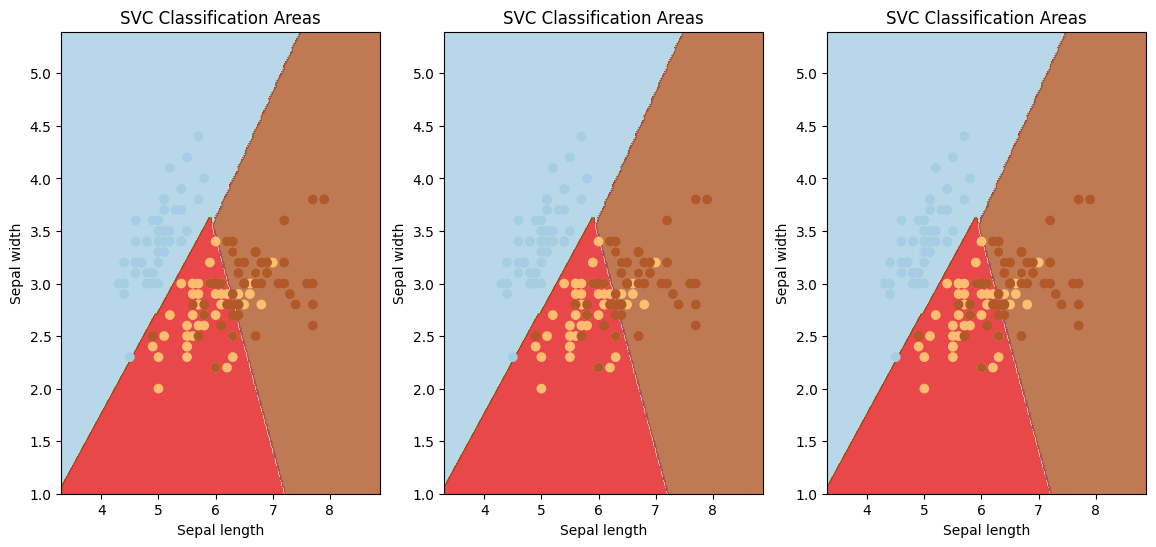

In [5]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,g in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='linear', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

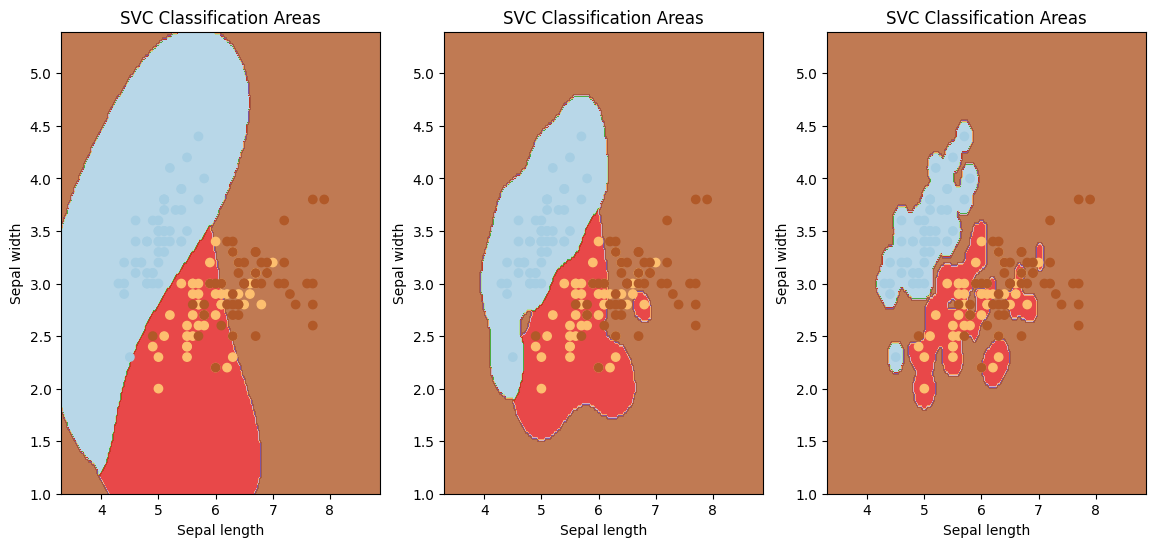

In [6]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,g in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='rbf', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

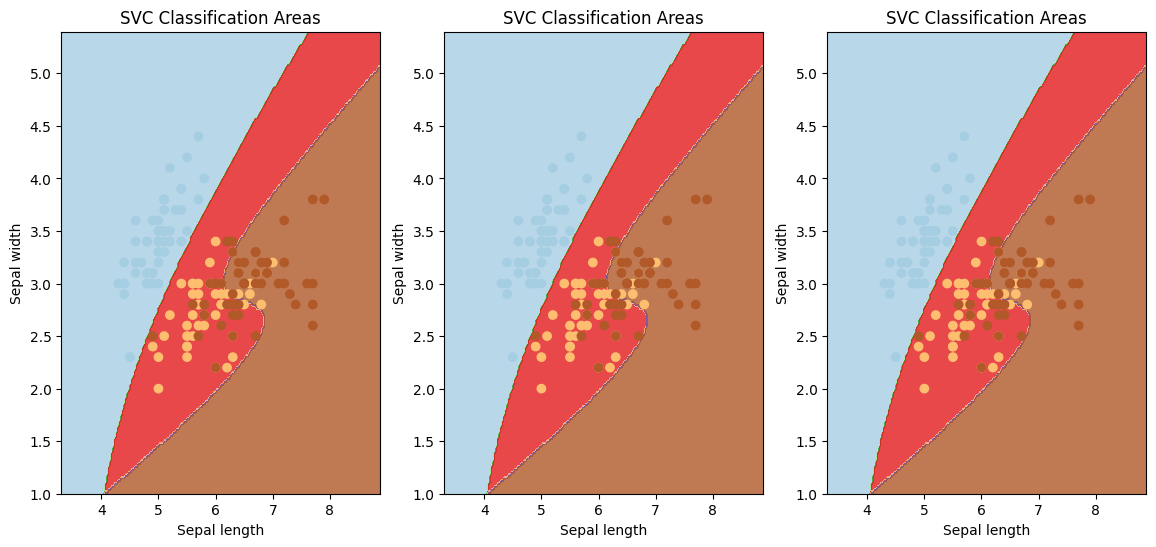

In [7]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,100]):
    plot_contour(
        SVC(kernel='poly', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

## Problem 2

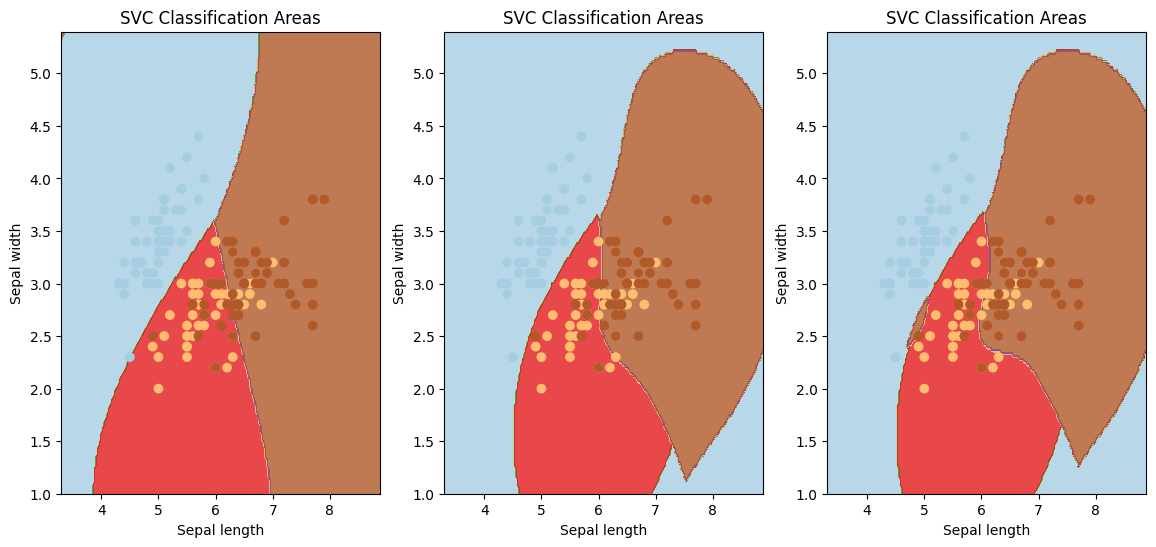

In [8]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,100, 1000]):
    plot_contour(
        SVC(kernel='rbf', C=c, gamma="auto").fit(X, y), 
        X, y, ax[i]
    )

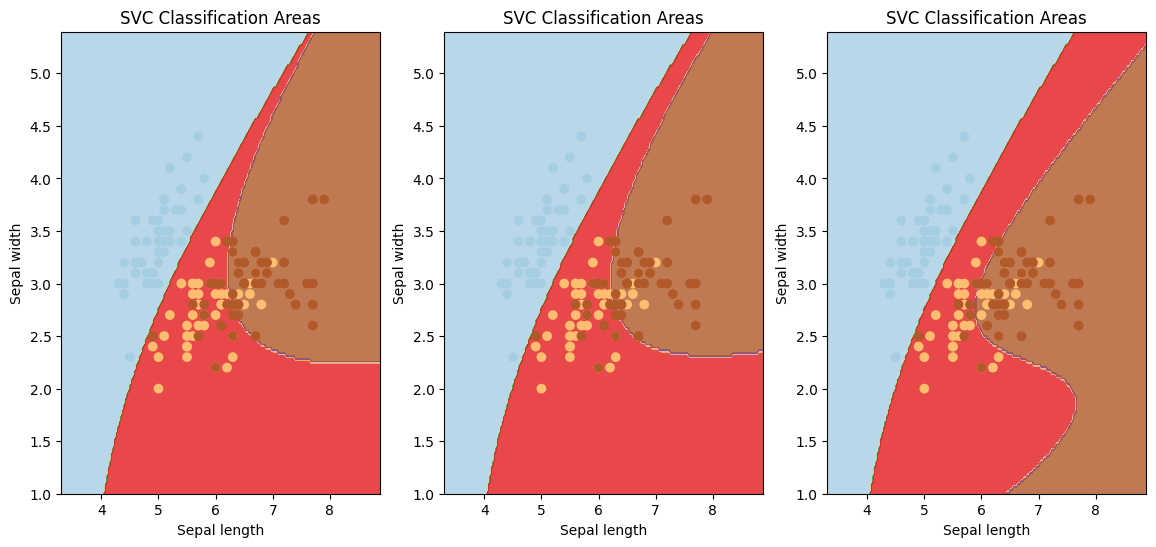

In [9]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,c in enumerate([1,10,1000]):
    plot_contour(
        SVC(kernel='poly', C=c, gamma="auto").fit(X, y), 
        X, y, ax[i]
    )

## Problem 3

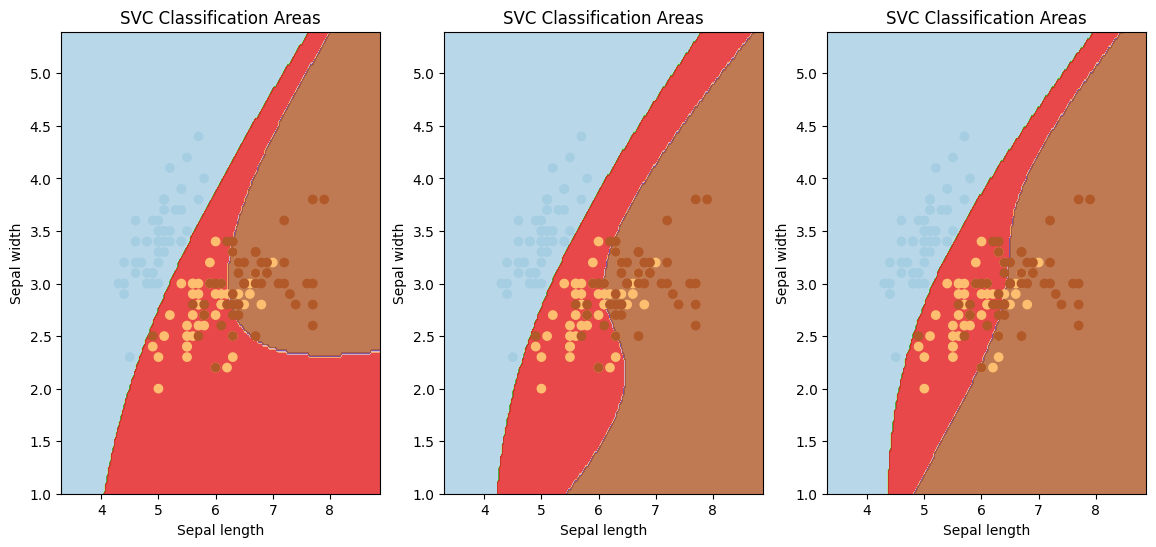

In [10]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,d in enumerate(range(3,6)):
    plot_contour(
        SVC(kernel='poly', C=1, gamma=1, degree=d).fit(X, y), 
        X, y, ax[i]
    )

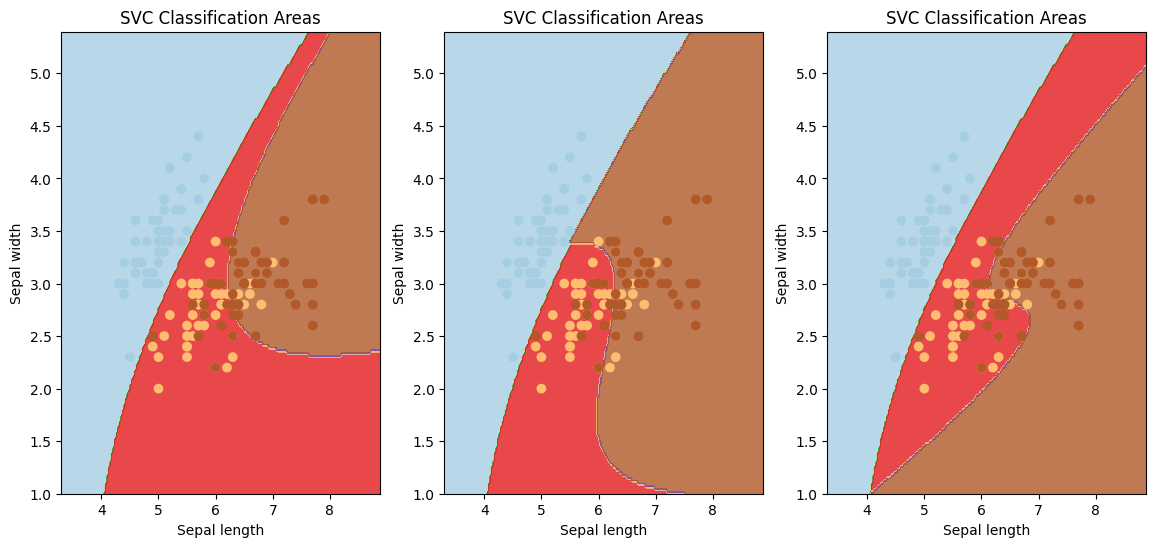

In [11]:
f, ax = plt.subplots(1,3, figsize=(14,6))
for i,g in enumerate([1, 10, 100]):
    plot_contour(
        SVC(kernel='poly', C=1, gamma=g).fit(X, y), 
        X, y, ax[i]
    )

## Problem 4

By removing a few support vectors, the decision boundary will change, since it will have to select support vectors from the subset of available points.

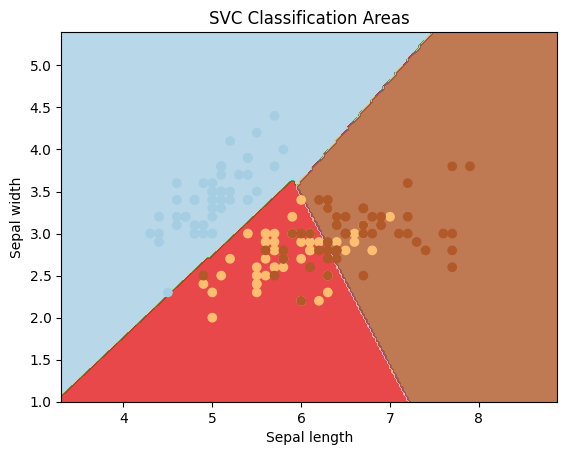

In [12]:
svc = SVC(kernel="linear").fit(X,y)

f, ax = plt.subplots(1,1)
plot_contour(svc, X, y,ax)

In [13]:
svc.support_vectors_.shape

(81, 2)

We will remove the first 20 support vectors from the training set

In [14]:
remove_index = []
for i in range(20):
    remove_index.append(
        np.where(
            np.logical_and(
                *(X == svc.support_vectors_[i]).T
            )
        )[0][0])
remove_index

[1, 18, 20, 25, 20, 36, 41, 12, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63]

In [15]:
small_index = pd.Index(range(len(X))).difference(remove_index)

In [16]:
small_X = X[small_index]
small_y = y[small_index]

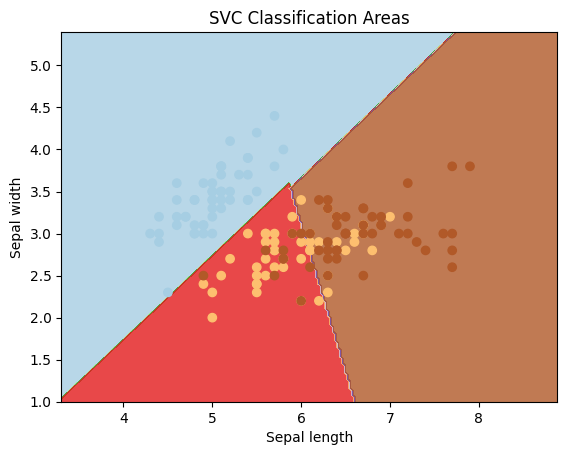

In [17]:
svc = SVC(kernel="linear").fit(small_X, small_y)

f, ax = plt.subplots(1,1)
plot_contour(svc, X, y,ax)

As expected, the margins changed. We can see that the red area god smaller, and the brown area got bigger

## Problem 5

In [18]:
from sklearn.model_selection import GridSearchCV, train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Using GridSearch

In [20]:
params = {
    "C":np.linspace(1, 1000, 15),
    "gamma":np.linspace(1,1000,15)
}

model = GridSearchCV(SVC(), param_grid=params, cv=5, scoring="accuracy").fit(X_train, y_train)

In [21]:
model.best_params_

{'C': 1.0, 'gamma': 1.0}

In [22]:
model.best_score_

0.7833333333333333

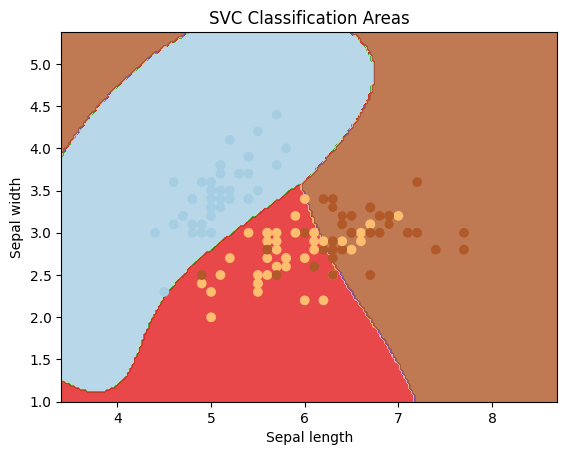

In [23]:
f,ax = plt.subplots(1,1)
plot_contour(model, X_train, y_train,ax)

In [24]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [25]:
preds = model.predict(X_test)

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.56      0.71      0.63         7
           2       0.83      0.71      0.77        14

    accuracy                           0.80        30
   macro avg       0.80      0.81      0.80        30
weighted avg       0.82      0.80      0.80        30



In [27]:
print("Accuracy =", accuracy_score(y_test, preds))

Accuracy = 0.8


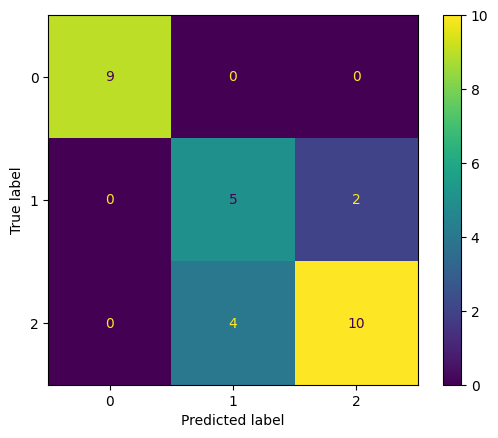

In [28]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds)
).plot()

### Using Base Parameters

In [29]:
preds = SVC().fit(X_train, y_train).predict(X_test)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.50      0.71      0.59         7
           2       0.82      0.64      0.72        14

    accuracy                           0.77        30
   macro avg       0.77      0.79      0.77        30
weighted avg       0.80      0.77      0.77        30



In [31]:
print("Accuracy =", accuracy_score(y_test, preds))

Accuracy = 0.7666666666666667


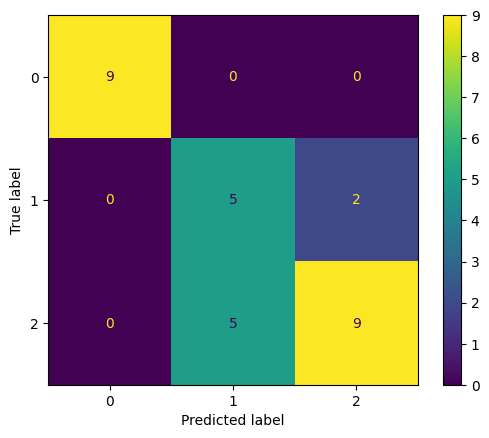

In [32]:
ConfusionMatrixDisplay(
    confusion_matrix(y_test, preds)
).plot()

The results obtained from the GridSearch model performed better than the base model, using accuracy as a measurement.

[comment]: <> (The results seem to be the same, which means that the "scale" gamma parameter, most likely, also selected *1* as the gamma value.)

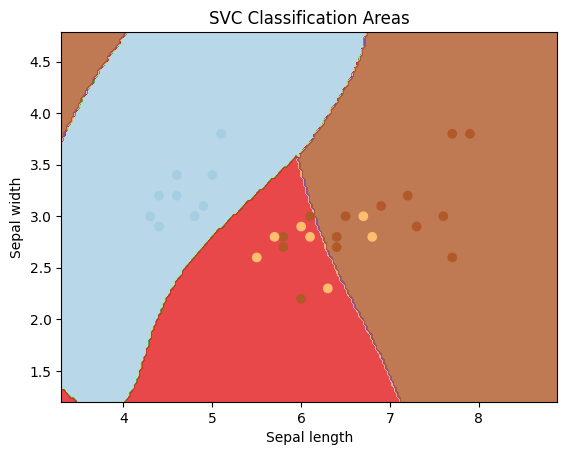

In [33]:
f,ax = plt.subplots(1,1)
plot_contour(model, X_test, y_test,ax)

## Problem 6

In [34]:
data = pd.read_csv("points.csv")

In [35]:
data.head()

,x,y,color
0,-6.5,4.75,Red
1,-5.7,3.20,Red
2,-5.0,2.20,Red
3,-3.2,1.25,Red
4,-2.2,1.10,Red


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder().fit(data.color)
color_encoded = encoder.transform(data.color)

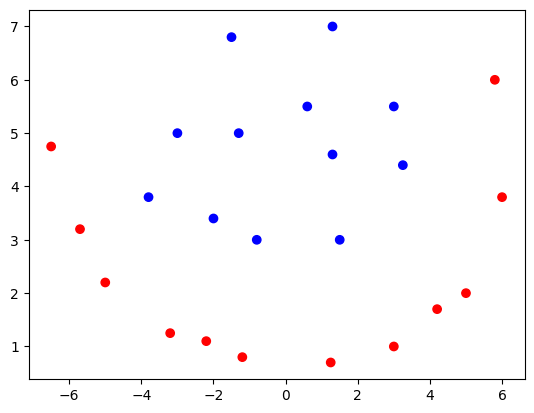

In [38]:
plt.scatter(data.x,data.y, c=data.color)

In [39]:
%matplotlib notebook

In [40]:
def plot_3d(x,y,z, label):
    f = plt.figure()
    ax = plt.axes(projection="3d")
    ax.scatter(x,y,z, c = label)

In [41]:
def transform(x,y):
    return x**2+y**2

<IPython.core.display.Javascript object>


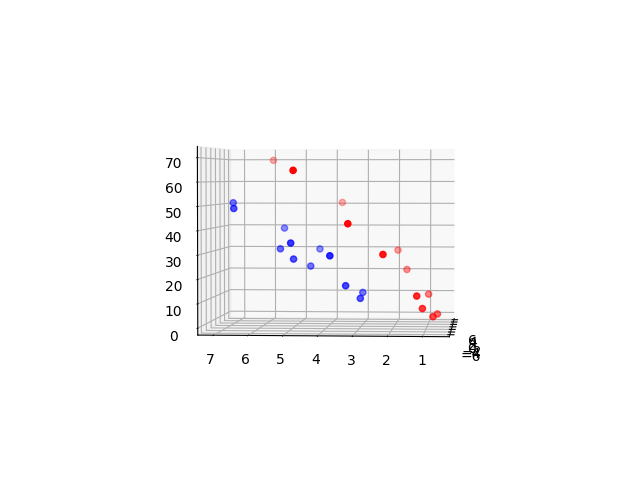

In [42]:
plot_3d(data.x, data.y, transform(data.x,data.y), data.color)

Text(0.5, 1.0, 'Y vs Z')

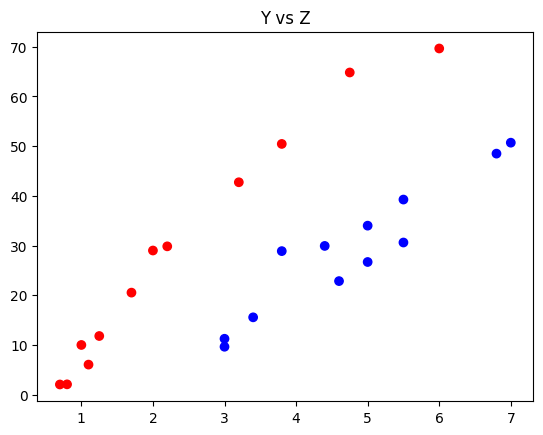

In [43]:
%matplotlib inline
plt.scatter(data.y, transform(data.x, data.y), c=data.color)

plt.title("Y vs Z")

In the 3D visualization we can see that there is a clear separation plane between both classes. Projecting the data in a 2D space using $Y$ in one axis and the new feature $Z = Y^2 + X^2$ in the other axis we can also see that there is a clear line that separates the classes

Since a polynomial transformation, with a degree level of $2$ could clearly separate the data, the kernel we will be trying is the Polynomial Kernel, with degree = $2$

In [44]:
model = SVC(kernel="poly", degree=2).fit(
    data[["x","y"]].to_numpy(), 
    color_encoded
)

In [45]:
model.score(
    data[["x","y"]].to_numpy(), 
    color_encoded
)

1.0

In [46]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

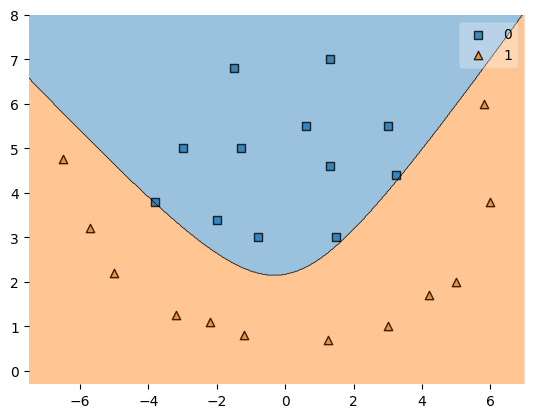

In [47]:
plot_decision_regions(
    data[["x", "y"]].to_numpy(), 
    color_encoded, 
    model
)

We can see that with the **Polynomial Kernel**, a separating hyperplane could be found that clearly separates both classes.